# Klimamodelle und ein Blick in die Daten
Timon Schmelzer, PeP et al. SoAk 2017

In [83]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [82]:
measurement_point_files = glob.glob('/data/climate/hourly/air_temperature/Metadaten_Geographie*.txt')

df_mps = pd.concat((pd.read_csv(f, sep=';', encoding='latin-1') 
                    for f in measurement_point_files))

df_mps.columns

Index(['Stations_id', 'Stationshoehe', 'Geogr.Breite', 'Geogr.Laenge',
       'von_datum', 'bis_datum', 'Stationsname'],
      dtype='object')

In [89]:
df_mps.reset_index(inplace=True, drop=True)

# Replace empty strings with nans
df_mps.replace(r'\s+', np.nan, regex=True, inplace=True)

# Convert date strings into datetime format
for col in ['von_datum', 'bis_datum']:
    df_mps[col] = pd.to_datetime(df_mps[col].apply(str))
    
df_mps['bis_datum'].replace(np.nan, pd.to_datetime('today'), inplace=True)

In [95]:
df_mps.head(20)

,Stations_id,Stationshoehe,Geogr.Breite,Geogr.Laenge,von_datum,bis_datum,Stationsname
0,3,162.7,50.7833,6.0833,1891-01-01,1900-06-10,Aachen
1,3,202.0,50.7833,6.1000,1900-06-11,1944-08-31,Aachen
2,3,190.0,50.7667,6.0833,1944-09-01,1945-03-31,Aachen
3,3,178.0,50.7833,6.1000,1945-04-01,1950-03-31,Aachen
4,3,202.0,50.7827,6.0941,1950-04-01,2008-10-07,Aachen
5,3,202.0,50.7827,6.0941,2008-10-08,2012-04-06,Aachen
6,44,48.0,52.8846,8.2308,1958-12-01,1971-02-28,Großenkneten
7,44,48.0,52.8846,8.2308,1971-03-01,1993-06-30,Großenkneten
8,44,42.0,52.9166,8.2208,1993-07-01,2007-03-31,Großenkneten
9,44,43.5,52.9335,8.2370,2007-04-01,2017-08-09,Großenkneten


In [100]:
def in_date_range(df, date_to_check, low_high_cols=['von_datum', 'bis_datum']):
    df_sel = df[(df[low_high_cols[0]] < date_to_check) & (date_to_test < df[low_high_cols[1]])]
    return df_sel

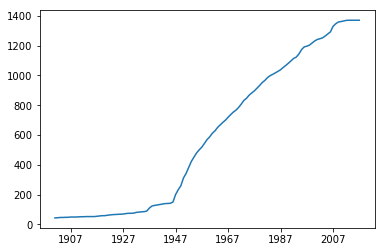

In [103]:
# Plot number of active measurement points per year
years = pd.date_range('1900-01-01', '2017-01-01', freq='A')
active_mps = [len(in_date_range(df_measurement_points, date)) 
              for date in years]

plt.plot(years, active_mps)
plt.show()

In [11]:
from IPython.core.display import display

import folium
from folium import plugins

map_germany = folium.Map(location=[51, 10], zoom_start=6)

# Add multpiple markers at once
mps = plugins.MarkerCluster(
    df_measurement_points[['Geogr.Breite', 'Geogr.Laenge']].as_matrix(), 
#    df_measurement_points['Stationsname']
)
map_germany.add_child(mps)

map_germany